https://github.com/p-park6/eds220-hwk-4# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/p-park6/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

-[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

-[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

In [1]:
### ===== FINAL CODE =====
# import libraries and functions
import os
import numpy as np
import pandas as pd

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle

from shapely import Point
from shapely import Polygon
from shapely import box
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


# Read in bands dataset
#create pathway
ca_bands_fp = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
#read data using pathway
ca_fires_bands_2017 = rioxr.open_rasterio(ca_bands_fp)

# Read in California perimeter dataset
ca_fires_perimeter_2017= gpd.read_file(os.path.join(os.getcwd(),'data', 'California_Fire_Perimeters_2017', 'California_Fire_Perimeters_2017.shp'))


#get rid of band in ca_fires_band_2017
# original dimensions and coordinates
print('original dimensions: ', ca_fires_bands_2017.dims,'\n')

# remove length 1 dimension (band)
ca_fires_bands_2017 = ca_fires_bands_2017.squeeze()
print('removed band from dimensions: ', ca_fires_bands_2017.dims,'\n')

# remove coordinates associated to band
ca_fires_bands_2017 = ca_fires_bands_2017.drop('band')
print('new dimensions: ', ca_fires_bands_2017.dims)


#change column names:
#make columns lower case
ca_fires_perimeter_2017.columns = ca_fires_perimeter_2017.columns.str.lower()


#change crs
ca_fires_perimeter_2017 = ca_fires_perimeter_2017.to_crs(ca_fires_bands_2017.rio.crs)


#create thomas fire perimeter
thomas_perimeter = ca_fires_perimeter_2017[ca_fires_perimeter_2017['fire_name']=='THOMAS']

## Import libraries and functions

In [2]:
# import libraries and functions
import os
import numpy as np
import pandas as pd

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle

from shapely import Point
from shapely import Polygon
from shapely import box
import matplotlib.pyplot as plt
import matplotlib.lines as mlines




original dimensions:  Frozen({'y': 731, 'x': 870, 'band': 1}) 

removed band from dimensions:  Frozen({'y': 731, 'x': 870}) 

new dimensions:  Frozen({'y': 731, 'x': 870})


## Import data

In [3]:
# Read in bands dataset
#create pathway
ca_bands_fp = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
#read data using pathway
ca_fires_bands_2017 = rioxr.open_rasterio(ca_bands_fp)

# Read in California perimeter dataset
ca_fires_perimeter_2017= gpd.read_file(os.path.join(os.getcwd(),'data', 'California_Fire_Perimeters_2017', 'California_Fire_Perimeters_2017.shp'))

## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

In [4]:
#look at head of fire perimeter
ca_fires_perimeter_2017.head()

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,...,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((-13229521.754 4046254.111, -13229510..."
4,19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,...,2.893327,Rough per description. waiting for walked GPS...,None,None,None,None,2010,484.388887,17133.006159,"POLYGON ((-13229663.036 4046858.853, -13229667..."


<AxesSubplot:>

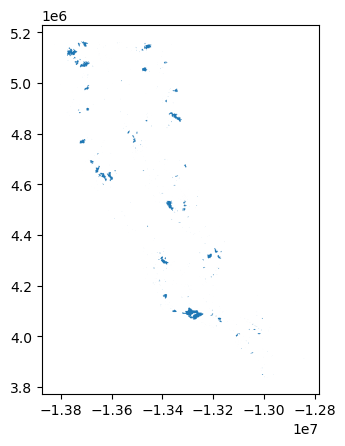

In [5]:
#plot data to see what it looks like
ca_fires_perimeter_2017.plot()

In [6]:
#print bands data
ca_fires_bands_2017

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [7]:
#get rid of band in ca_fires_band_2017
# original dimensions and coordinates
print('original dimensions: ', ca_fires_bands_2017.dims,'\n')

# remove length 1 dimension (band)
ca_fires_bands_2017 = ca_fires_bands_2017.squeeze()
print('removed band from dimensions: ', ca_fires_bands_2017.dims,'\n')

# remove coordinates associated to band
ca_fires_bands_2017 = ca_fires_bands_2017.drop('band')
print('new dimensions: ', ca_fires_bands_2017.dims)

original dimensions:  Frozen({'y': 731, 'x': 870, 'band': 1}) 

removed band from dimensions:  Frozen({'y': 731, 'x': 870}) 

new dimensions:  Frozen({'y': 731, 'x': 870})


## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


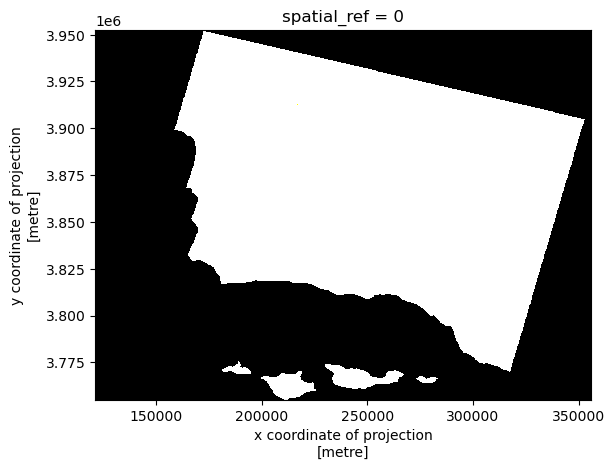

In [8]:
#select the red, green, and blue variables and plot them
ca_fires_bands_2017[['red', 
                     'green', 
                     'blue']].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

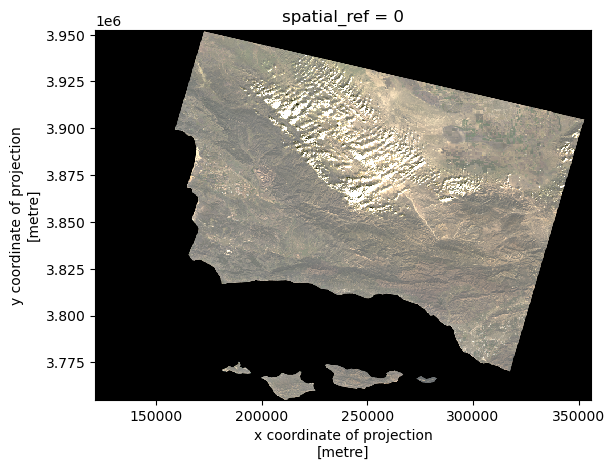

In [9]:
#Adjust the scale so the red, green, and blue bands show up in the image
ca_fires_bands_2017[['red', 
                     'green', 
                     'blue']].to_array().plot.imshow(robust = True)

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

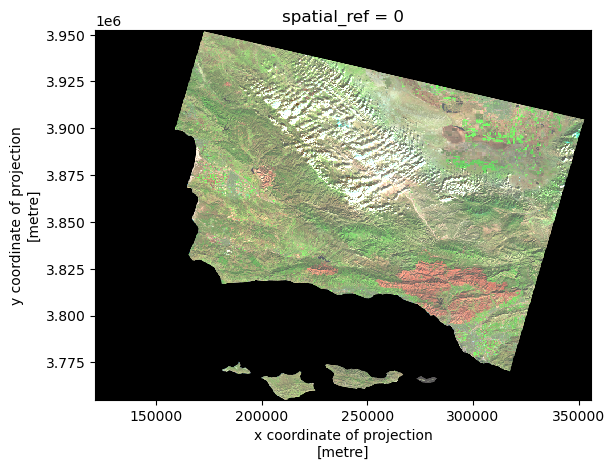

In [10]:
#plot a false color image by plotting the swir22, nir, and red variables
ca_fires_bands_2017[['swir22', 
                     'nir08', 
                     'red']].to_array().plot.imshow(robust = True)

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [11]:
#look at the columns in ca_fire_perimeter_2017
ca_fires_perimeter_2017.columns

Index(['index', 'OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NA', 'COMPLEX_IN', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [12]:
#look at the unique names in the column "FIRE_NAME" and find Thomas
ca_fires_perimeter_2017.FIRE_NAME.unique()

array(['BROOK', 'PACIFIC', 'GRADE', 'PACIFICA', 'MONTVIEW', 'PALMA',
       'CANYON', 'VISTA', 'BALDWIN', 'ROLLING', 'MCWANE',
       'SCHOOL\r\nSCHOOL', 'FORK', 'LIBBEY', 'SCALES', 'RUNNER', 'DINELY',
       'ROADRUNNER', 'ELEPHANT 2', 'TEHAMA', 'BOLLA', 'CRABTREE', 'FALLS',
       'GOLD', 'HARNEY', 'JACKSONVILLE', 'LAKE', 'MARIA', 'MILTON',
       'ORANGE', 'PALOMA', 'QUAIL', 'RED', 'TABLE', 'TWIST', 'WILLMS',
       'ZAMORA', 'POINT', 'ROCKY', 'SHANDON', 'SOLAR', 'LUCY', 'TOWER',
       'OLIVE', 'CYPRESS', 'CHALK', 'STONE', 'WEST', 'ALAMO', 'HILL',
       'GAVIOTA', 'ZENON', 'CAMATTA', 'RANCH', 'MARGARITA', 'HUASNA',
       'COVE', 'POLY', 'LINNE', 'SODA', 'LYNCH', 'CAMP', 'VILLA', 'CRAM',
       'HILT', 'CANTERA', 'EDGEWOOD', 'WHITEPINE', 'KILLGORE', 'OAKWOOD',
       'DAVIS', 'BOGUS', 'HORNBROOK', 'MACDOEL', 'APSUUN', 'BAILEY',
       'DORRIS', 'COMSTOCK', 'FAY', 'SHULMEYER', 'HAWKINSVILLE', 'MEADOW',
       'GAZELLE', 'STATELINE', 'PLEASANT', 'OWENS', 'JUNIPER', 'MARBLE',
       

In [13]:
#change column names:
#make columns lower case
ca_fires_perimeter_2017.columns = ca_fires_perimeter_2017.columns.str.lower()
#print columns names to make sure they were changed
ca_fires_perimeter_2017.columns

Index(['index', 'objectid', 'year_', 'state', 'agency', 'unit_id', 'fire_name',
       'inc_num', 'alarm_date', 'cont_date', 'cause', 'c_method', 'objective',
       'gis_acres', 'comments', 'complex_na', 'complex_in', 'irwinid',
       'fire_num', 'decades', 'shape_leng', 'shape_area', 'geometry'],
      dtype='object')

In [14]:
#change crs
ca_fires_perimeter_2017 = ca_fires_perimeter_2017.to_crs(ca_fires_bands_2017.rio.crs)
#see if they matched after the change
print('matched crs?',  ca_fires_perimeter_2017.crs == ca_fires_bands_2017.rio.crs)

matched crs? True


In [15]:
#create thomas fire perimeter
thomas_perimeter = ca_fires_perimeter_2017[ca_fires_perimeter_2017['fire_name']=='THOMAS']
#print to see if thomas perimeter was captured
thomas_perimeter

,index,objectid,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,...,gis_acres,comments,complex_na,complex_in,irwinid,fire_num,decades,shape_leng,shape_area,geometry
436,20274,41874,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,...,281790.875,CONT_DATE based on Inciweb,None,None,None,None,2010,540531.887458,1.681106e+09,"MULTIPOLYGON (((259241.263 3814482.913, 259193..."


## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

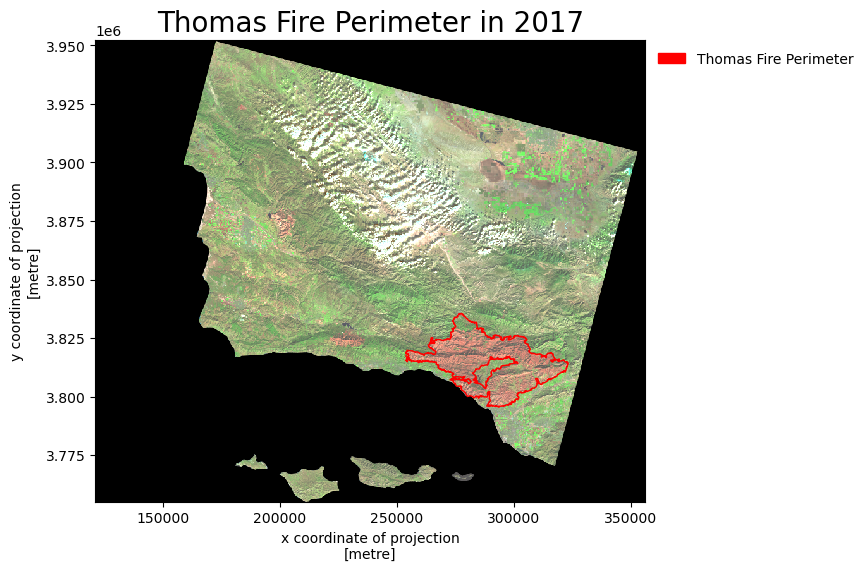

In [22]:
#create map
#plot an empty plot
fig, ax = plt.subplots(figsize = (8,6))


#plot CA fire bands map as the base
ca_fires_bands_2017[['swir22', #subset for the three wanted bands
                     'nir08', 
                     'red']].to_array().plot.imshow(ax = ax,
                                                    robust = True)

#plot thomas fire perimeter over base map
thomas_perimeter.plot(ax = ax, edgecolor = "red", color = 'none') #plot thomas_perimeter
thomas_perimeter_patches = mpatches.Patch( color = "red", #create label for legend and change color
                                    label = "Thomas Fire Perimeter") #set label

#set title for map
ax.set_title('Thomas Fire Perimeter in 2017',
fontsize=20) #change font size

#add legend onto map
ax.legend(handles = [thomas_perimeter_patches], frameon=False, loc='upper left', bbox_to_anchor = (1, 1))

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.